# Import Required Libraries
Import libraries such as pandas, numpy, matplotlib, and scikit-learn's preprocessing module.

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer  # For normalization techniques

# Load the Iris Dataset
Load the Iris dataset using scikit-learn's datasets module and convert it into a pandas DataFrame for easier manipulation.

In [2]:
# Load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame for completeness
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Explore the Dataset
Perform basic exploratory data analysis (EDA) such as checking the shape, column names, and summary statistics of the dataset.

In [3]:
# Check the shape of the dataset
print("Shape of the dataset:", iris_df.shape)

# Display the column names
print("\nColumn names:")
print(iris_df.columns)

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(iris_df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(iris_df.isnull().sum())

# Display the distribution of the target variable
print("\nDistribution of target variable:")
print(iris_df['target'].value_counts())

Shape of the dataset: (150, 5)

Column names:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0

# Split the Dataset
Split the dataset into features (X) and target (y), and further split it into training and testing sets using train_test_split.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = iris_df.iloc[:, :-1]  # All columns except the last one
y = iris_df['target']  # The target column

# Further split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


# Apply Normalization
Use scikit-learn's MinMaxScaler to normalize the feature data and demonstrate how the values are scaled between 0 and 1.

In [5]:
# Apply normalization using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert the normalized data back to DataFrame for better readability
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Display the first few rows of the normalized training data
print("First few rows of normalized training data:")
print(X_train_normalized_df.head())

# Display the range of values in the normalized training data
print("\nRange of values in normalized training data:")
print(f"Min: {X_train_normalized_df.min().min()}, Max: {X_train_normalized_df.max().max()}")

First few rows of normalized training data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.088235          0.666667           0.000000          0.041667
1           0.411765          1.000000           0.087719          0.125000
2           0.705882          0.458333           0.596491          0.541667
3           0.147059          0.583333           0.105263          0.041667
4           0.029412          0.500000           0.052632          0.041667

Range of values in normalized training data:
Min: 0.0, Max: 1.0


# Compare Before and After Normalization
Visualize the data before and after normalization using histograms or box plots to show the effect of normalization.

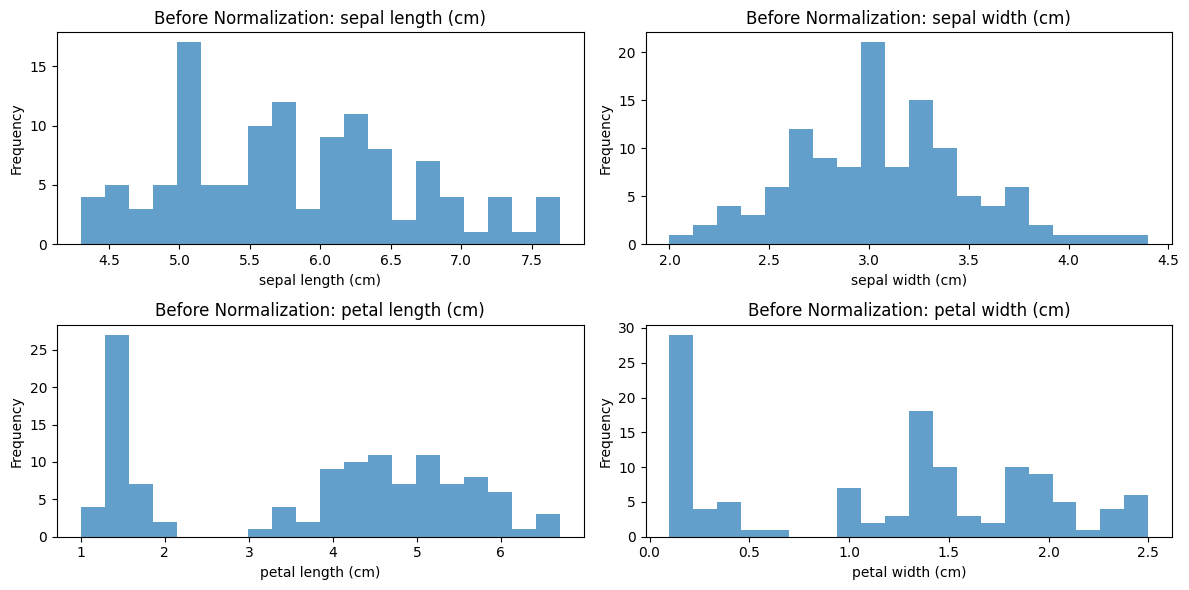

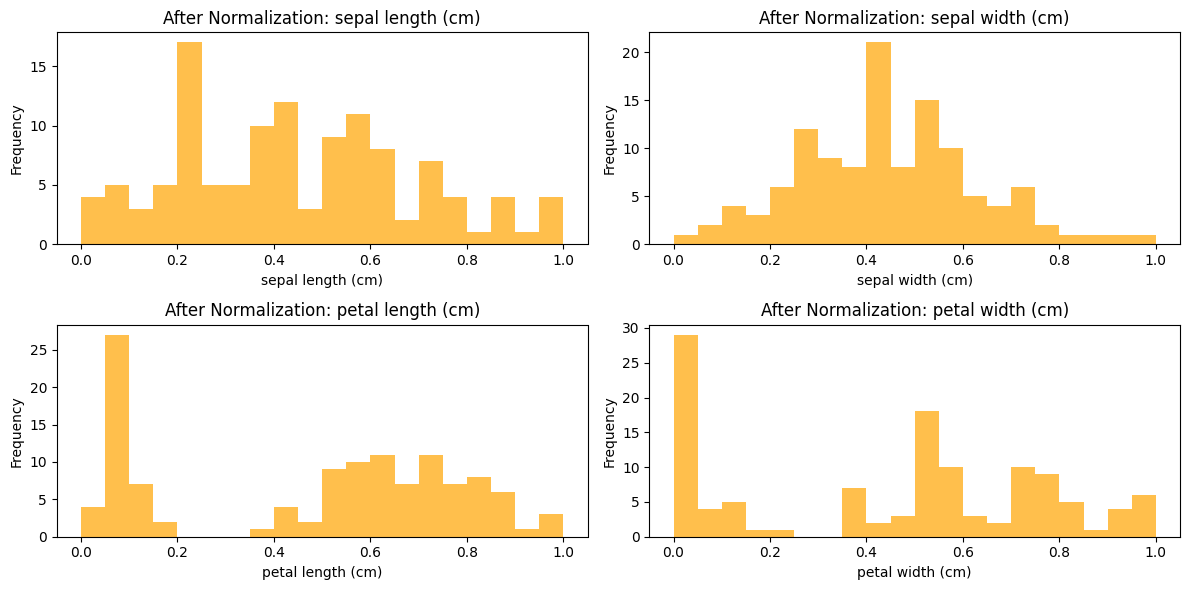

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_8400\256323752.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train.values, labels=X_train.columns, vert=False)


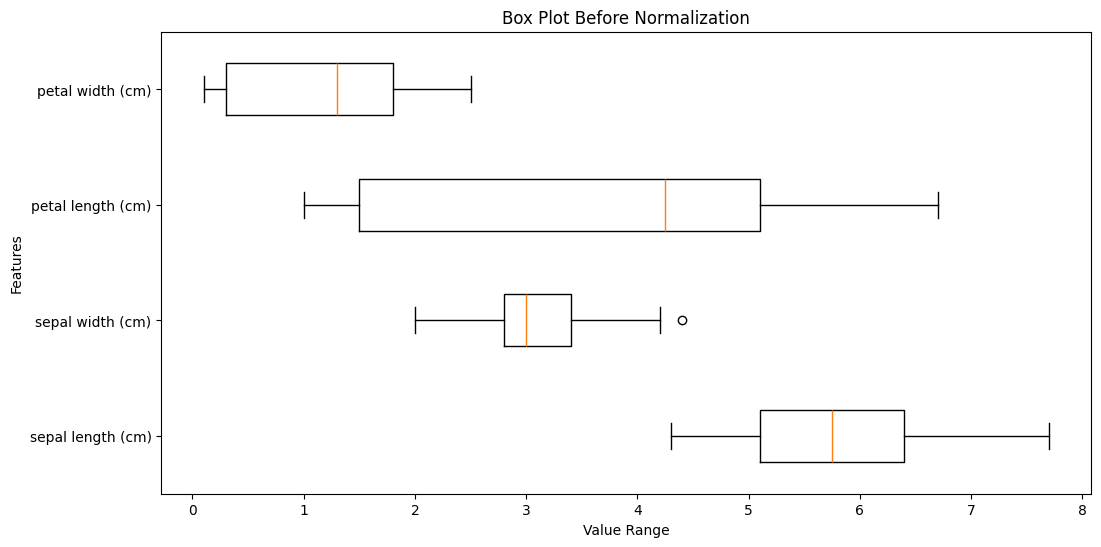

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_8400\256323752.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train_normalized_df.values, labels=X_train_normalized_df.columns, vert=False)


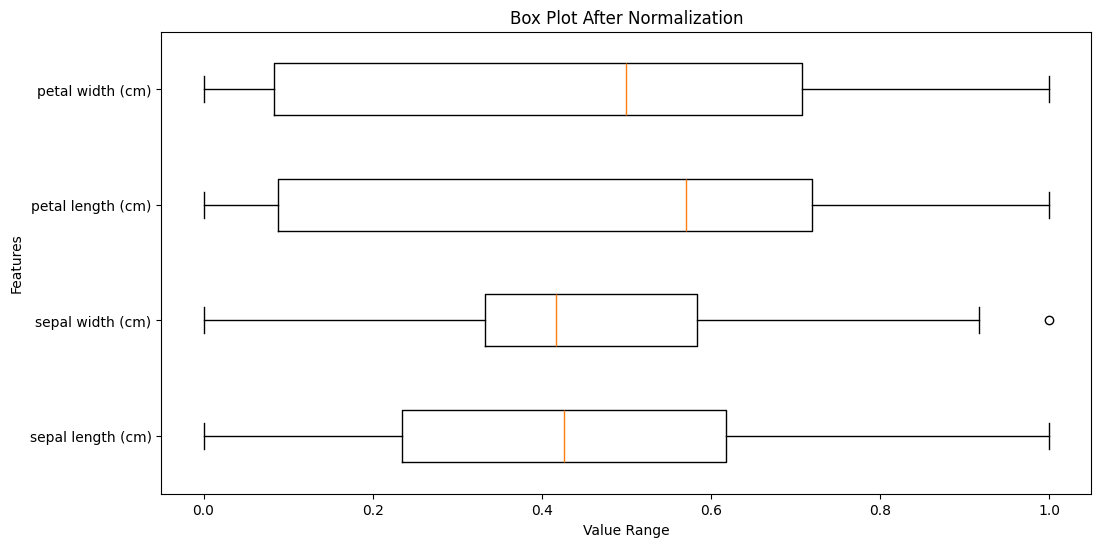

In [6]:
# Visualize the data before and after normalization using histograms

# Before Normalization
plt.figure(figsize=(12, 6))
for i, column in enumerate(X_train.columns):
    plt.subplot(2, 2, i + 1)
    plt.hist(X_train[column], bins=20, alpha=0.7, label='Before Normalization')
    plt.title(f'Before Normalization: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# After Normalization
plt.figure(figsize=(12, 6))
for i, column in enumerate(X_train.columns):
    plt.subplot(2, 2, i + 1)
    plt.hist(X_train_normalized_df[column], bins=20, alpha=0.7, label='After Normalization', color='orange')
    plt.title(f'After Normalization: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the data before and after normalization using box plots

# Before Normalization
plt.figure(figsize=(12, 6))
plt.boxplot(X_train.values, labels=X_train.columns, vert=False)
plt.title('Box Plot Before Normalization')
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.show()

# After Normalization
plt.figure(figsize=(12, 6))
plt.boxplot(X_train_normalized_df.values, labels=X_train_normalized_df.columns, vert=False)
plt.title('Box Plot After Normalization')
plt.xlabel('Value Range')
plt.ylabel('Features')
plt.show()